In [1]:
from mems_model import mems_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# MEMS2k model
Initial version: 03/17/2025

Created by: fquiros

The model is built upon a single influence function extracted from a full real measured dataset from MagAO-X MEMS2k DM (courtesy of J. Males). 

*Note 1:* The pitch of the real MEMS2k was also estimated from the real data, and stored in the "reference influence function file". This file is pass on to **mems_model** to build the model.

*Note 2:* The valid 2040 actuators are defined in the "actuator mask" passed on to the **mems_model**. Our first assumption is that *all* actuators are operational. This definition should be revisited to take into account actuator defects (e.g. non-working, coupled, ...)

The actuators pitch in meters is a free parameter of the **mems_model** class.

In [4]:
#-- Data files containing Influence Function and actuator mask.
ref_ifunc_fname = './data/mems2k/MagAO-X_MEMS2k_ReferenceIF.npz'
act_mask_fname = './data/mems2k/BMC_2k_act_mask.npz'

#-- Specify desired actuator pitch in meters.
Dtel = 25.4 #m
act_pitch_m = Dtel / 48

#-- Initialize the model using the mems_model class
mems2k = mems_model(ref_ifunc_fname, act_mask_fname, act_pitch_m=act_pitch_m)

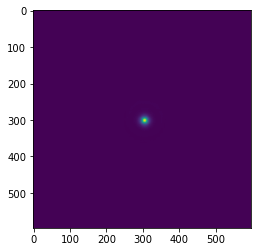

In [5]:
#-- Show reference influence function
plt.imshow(mems2k._mems_model__ref_ifunc)

A full set of influence functions is simply built by replicating such influence function on each location of a grid.

Total number of actuators: 2040


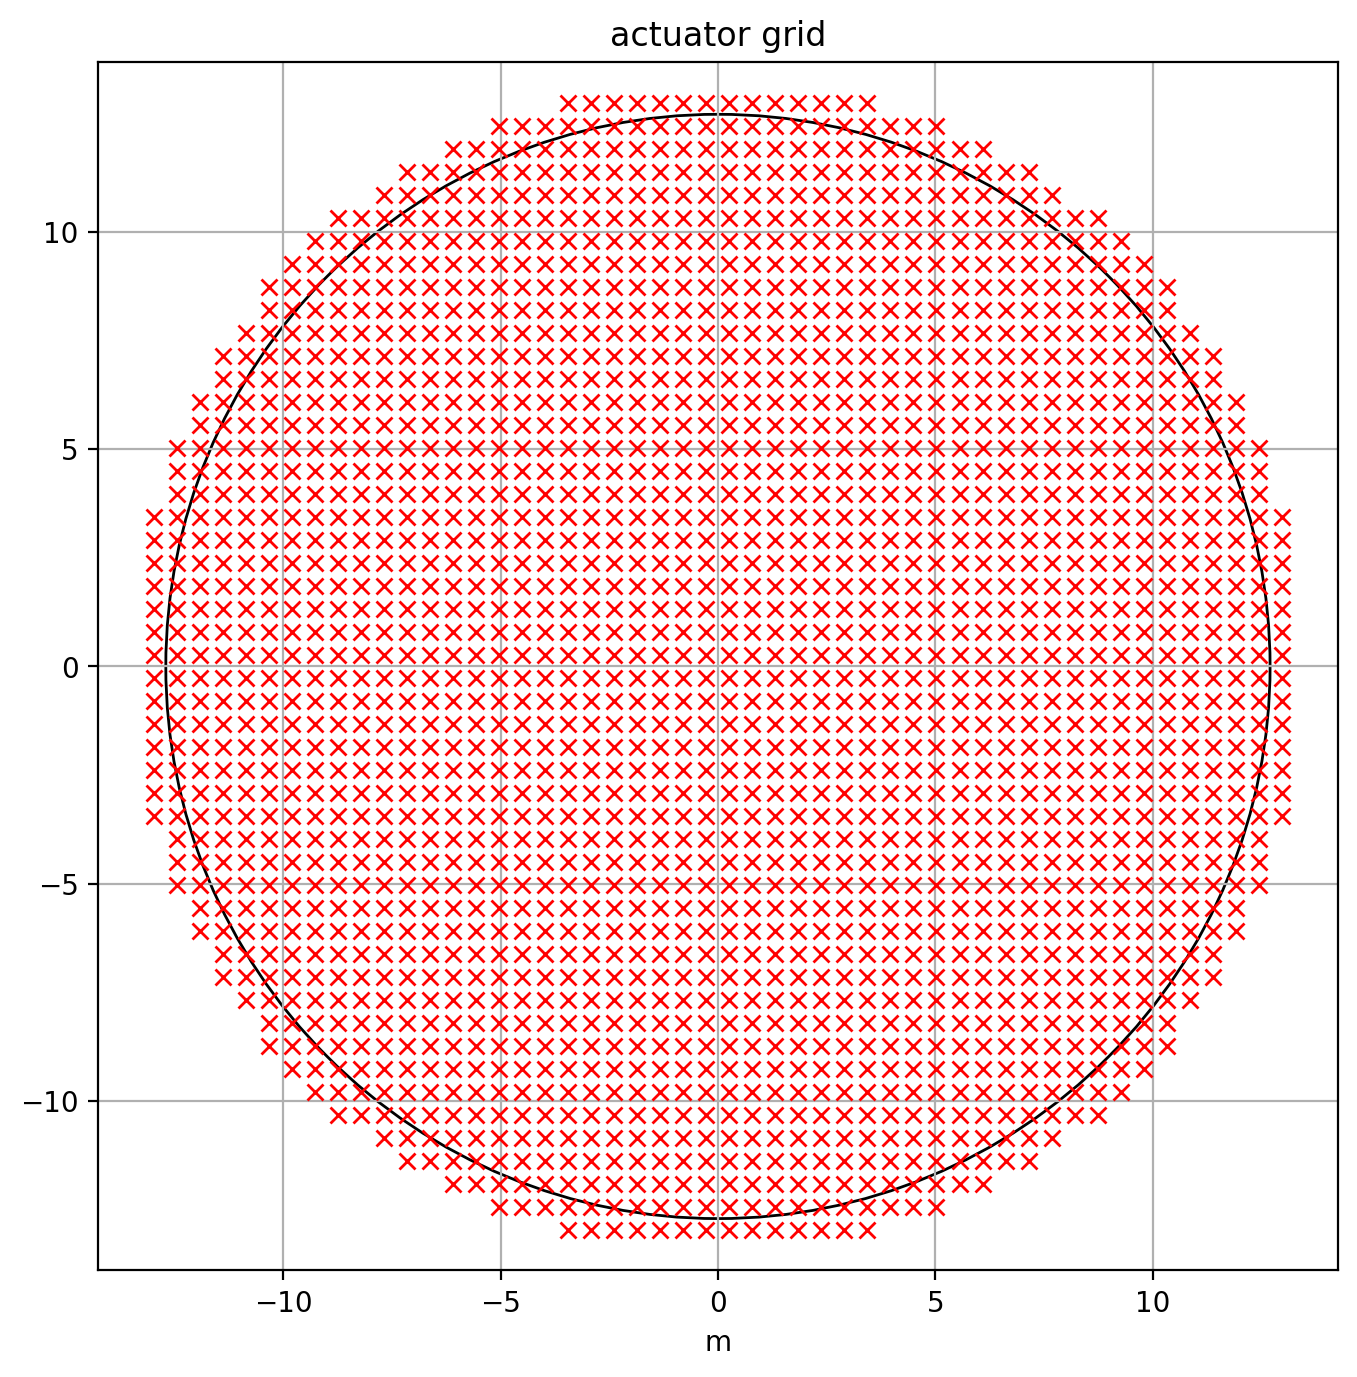

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches((8,8))
fig.dpi = 200
ax.plot(mems2k._act_x_meters, mems2k._act_y_meters, 'rx')
ax.axis('equal')
ax.set_title('actuator grid')
ax.set_xlabel('m')
ax.grid()

circ = Circle((0,0), Dtel/2, fill=False, color='k')
ax.add_artist(circ)

print('Total number of actuators: %d'%mems2k.n_acts)

## Generate IF cube
Compute all influence functions over the defined actuator grid, and store them as a data cube. The sampling of the arrays in the data cube is a free parameter. Influence functions will be interpolated in the defined grid respecting the original actuator pitch.

In [7]:
array_size_m = 25.5  # [m] Diameter of simulated square (slightly larger than GMT diameter) 
array_size_pix = 460 # numbers of pixels across the data array
array_pixscale = array_size_m / (array_size_pix-1)

In [8]:
mems2k.compute_if_cube(array_size_pix, array_size_m)

Completed creation of influence function cube of size 460 x 460 x 2040.


### Show some examples of actuator patterns

**Example 1.** Show every 13th influence function in the cube.

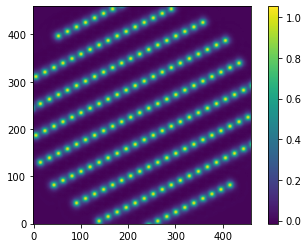

In [9]:
gridact_idx_test = np.arange(0, mems2k._grid_n_acts**2, 13)
act_idx_test = mems2k.gridact_to_act(gridact_idx_test)
plt.imshow( np.sum(mems2k.IFcube[:,:,act_idx_test], axis=2), origin='lower')
plt.colorbar()

**Example 2.** Show the famous *dagger* pattern used on HCAT.

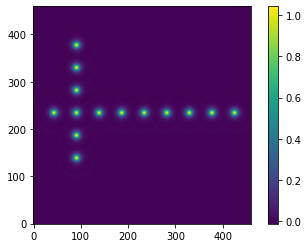

In [10]:
dagger_ongrid = [ 760, 1010, 1255, 1260, 1265, 1270, 1275, 1280, 1285, 1290, 1295, 1510, 1760, 2010]
dagger = mems2k.gridact_to_act(dagger_ongrid)

plt.imshow( np.sum(mems2k.IFcube[:,:,dagger], axis=2), origin='lower')
plt.colorbar()

Save influence functions to a dedicated file.